# Car Model Pricing Project 

In [1]:
#testing code 
print('Hello World')

Hello World


In [2]:
## import data manipulation and ML libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import validation_curve

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor



In [3]:
# !pip install webdriver-manager

## Machine learning: preparation for regression models

In [7]:
#reading the data 
autoall = pd.read_csv('Data/autotrader_all.csv', index_col = 0)

In [8]:
#dataframes
autoall_df = pd.DataFrame(autoall)

In [9]:
#overview of first few headers 
print('autoall_df first few rows: ' )
print('\n')
display(autoall_df.head())



autoall_df first few rows: 




,price,year,type,mileage,engine_size,power,transmission,fueltype,make,model
0,89995.0,2001.0,Convertible,14400.0,4.9,225.0,Manual,Petrol,AC,Cobra
1,145500.0,2022.0,Convertible,500.0,NaN,NaN,Manual,Petrol,AC,Cobra
2,124950.0,1989.0,Convertible,15142.0,5.0,NaN,Manual,Petrol,AC,Cobra
3,69950.0,2022.0,NaN,10037.0,1.4,158.0,Manual,Petrol,AK,Cobra
4,19698.0,2020.0,Convertible,37000.0,1.4,160.0,Manual,Petrol,Abarth,595


### EDA -Exploratory Data Analysis

In [10]:
#function to return general overview of data

def explore(data):
    print('data head: \n')
    display(data.head())
    print('info: \n')
    display(data.info())
    print('description statistics: \n')
    display(data.describe())
    print('how many rows?: \n')
    display(len(data))
    print('How many nulls: \n')
    display(data.isna().sum())
    

In [11]:
explore(autoall_df)

data head: 



,price,year,type,mileage,engine_size,power,transmission,fueltype,make,model
0,89995.0,2001.0,Convertible,14400.0,4.9,225.0,Manual,Petrol,AC,Cobra
1,145500.0,2022.0,Convertible,500.0,NaN,NaN,Manual,Petrol,AC,Cobra
2,124950.0,1989.0,Convertible,15142.0,5.0,NaN,Manual,Petrol,AC,Cobra
3,69950.0,2022.0,NaN,10037.0,1.4,158.0,Manual,Petrol,AK,Cobra
4,19698.0,2020.0,Convertible,37000.0,1.4,160.0,Manual,Petrol,Abarth,595


info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13616 entries, 0 to 4511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         13615 non-null  float64
 1   year          13615 non-null  float64
 2   type          13601 non-null  object 
 3   mileage       13610 non-null  float64
 4   engine_size   13564 non-null  float64
 5   power         13486 non-null  float64
 6   transmission  13608 non-null  object 
 7   fueltype      13597 non-null  object 
 8   make          13615 non-null  object 
 9   model         13615 non-null  object 
dtypes: float64(5), object(5)
memory usage: 1.1+ MB


None

description statistics: 



,price,year,mileage,engine_size,power
count,1.361500e+04,13615.000000,13610.000000,13564.000000,13486.000000
mean,7.234036e+03,2011.698862,80082.577517,1.707689,129.586015
std,2.457158e+04,5.229571,39390.392384,0.564609,50.333395
min,2.360000e+02,1956.000000,2.000000,0.500000,20.000000
25%,2.850000e+03,2009.000000,52731.250000,1.400000,95.000000
50%,4.995000e+03,2012.000000,79470.500000,1.600000,118.000000
75%,8.990000e+03,2015.000000,104298.250000,2.000000,150.000000
max,1.449900e+06,2023.000000,418000.000000,8.000000,700.000000


how many rows?: 



13616

How many nulls: 



price             1
year              1
type             15
mileage           6
engine_size      52
power           130
transmission      8
fueltype         19
make              1
model             1
dtype: int64

### min/max and value counts

In [12]:
#columns 

autoall_df.columns

Index(['price', 'year', 'type', 'mileage', 'engine_size', 'power',
       'transmission', 'fueltype', 'make', 'model'],
      dtype='object')

In [13]:
#function for min and max values for numerical columns 

def min_max_value_count(data_col): 
    print('max value: \n')
    display(data_col.max())
    print('min value: \n')
    display(data_col.min())
    print('value count: \n')
    display(data_col.value_counts())


In [14]:
#price
min_max_value_count(autoall_df.price)

max value: 



1449900.0

min value: 



236.0

value count: 



2495.0     236
1995.0     206
2995.0     176
3995.0     176
2500.0     175
          ... 
5775.0       1
6909.0       1
8994.0       1
19250.0      1
89995.0      1
Name: price, Length: 2045, dtype: int64

In [15]:
#mileage
min_max_value_count(autoall_df.mileage)

max value: 



418000.0

min value: 



2.0

value count: 



100000.0    131
85000.0     113
80000.0     107
70000.0      94
95000.0      94
           ... 
53603.0       1
30399.0       1
35525.0       1
93138.0       1
44520.0       1
Name: mileage, Length: 4933, dtype: int64

In [16]:
#year
min_max_value_count(autoall_df.year)

max value: 



2023.0

min value: 



1956.0

value count: 



2010.0    1212
2009.0    1078
2011.0    1072
2012.0     994
2013.0     921
2014.0     853
2019.0     834
2008.0     800
2015.0     767
2007.0     750
2018.0     722
2006.0     600
2016.0     599
2017.0     581
2005.0     384
2020.0     318
2004.0     303
2021.0     182
2003.0     173
2022.0      93
2002.0      92
2001.0      60
2000.0      48
1999.0      38
1998.0      28
1989.0      14
1997.0      12
1994.0      11
1991.0       9
1990.0       8
1995.0       7
1996.0       6
1985.0       5
1987.0       4
1980.0       4
1992.0       4
1988.0       3
1976.0       3
1972.0       2
1978.0       2
1983.0       2
2023.0       2
1969.0       2
1986.0       2
1993.0       2
1984.0       2
1973.0       1
1977.0       1
1960.0       1
1971.0       1
1956.0       1
1979.0       1
1967.0       1
Name: year, dtype: int64

In [17]:
#engine size 
min_max_value_count(autoall_df.engine_size)

max value: 



8.0

min value: 



0.5

value count: 



1.60    2683
2.00    2645
1.40    1197
1.20    1106
1.00    1002
1.50     859
1.80     747
3.00     487
2.10     407
0.90     390
1.30     382
2.20     372
1.70     255
2.50     181
1.25     166
1.90     112
1.10     102
2.70      74
3.20      72
2.40      60
3.50      44
2.30      23
2.80      20
2.60      18
5.00      17
4.80      17
4.40      14
2.90      14
4.20      13
4.00      11
4.50       9
3.60       8
3.70       8
3.40       8
3.10       6
0.80       4
8.00       4
0.85       4
3.80       3
5.50       3
5.20       3
4.30       2
3.30       2
5.40       2
0.50       1
4.90       1
7.50       1
6.50       1
6.20       1
5.70       1
6.00       1
0.60       1
Name: engine_size, dtype: int64

In [18]:
#power
min_max_value_count(autoall_df.power)

max value: 



700.0

min value: 



20.0

value count: 



148.0    593
113.0    506
89.0     500
138.0    472
168.0    446
        ... 
311.0      1
322.0      1
202.0      1
40.0       1
350.0      1
Name: power, Length: 252, dtype: int64

### most common category variable 

In [19]:
#function to get the distinct value counts for non-numerical categories 

def common_cat(data_col):
    return data_col.value_counts()


In [20]:
#brand
common_cat(autoall_df.make)


Mercedes-Benz    1386
Hyundai          1386
Audi             1386
Ford             1386
Dacia            1386
BMW              1176
Honda             612
Citroen           612
SEAT              612
KIA               612
Peugeot           612
Mazda             612
SKODA             612
Vauxhall          280
MINI              228
Volvo             120
Volkswagen        117
Porsche           117
Nissan            116
Austin             14
MG                 14
Infiniti           14
Isuzu              14
Toyota             14
Dodge              13
Chevrolet          13
Jaguar             13
Mitsubishi         12
Lamborghini        12
Land               11
Perodua            11
Abarth             10
Daewoo              9
Great               8
CUPRA               8
Caterham            6
Bugatti             5
Daihatsu            5
Levc                4
Leyland             4
Lotus               4
GMC                 3
Lancia              3
Panther             3
Lincoln             3
AC        

In [21]:
autoall_df.columns

Index(['price', 'year', 'type', 'mileage', 'engine_size', 'power',
       'transmission', 'fueltype', 'make', 'model'],
      dtype='object')

In [22]:
#printing rest of distinct counts for each feature 
print(common_cat(autoall_df.transmission))
print('\n')
print(common_cat(autoall_df.fueltype))
print('\n')
print(common_cat(autoall_df.make))
print('\n')
print(common_cat(autoall_df.model))

Manual       10233
Automatic     3375
Name: transmission, dtype: int64


Petrol                   8175
Diesel                   5288
Petrol Hybrid              63
Bi Fuel                    40
Electric                   13
Petrol Plug-in Hybrid      10
Diesel Hybrid               8
Name: fueltype, dtype: int64


Mercedes-Benz    1386
Hyundai          1386
Audi             1386
Ford             1386
Dacia            1386
BMW              1176
Honda             612
Citroen           612
SEAT              612
KIA               612
Peugeot           612
Mazda             612
SKODA             612
Vauxhall          280
MINI              228
Volvo             120
Volkswagen        117
Porsche           117
Nissan            116
Austin             14
MG                 14
Infiniti           14
Isuzu              14
Toyota             14
Dodge              13
Chevrolet          13
Jaguar             13
Mitsubishi         12
Lamborghini        12
Land               11
Perodua            11
Abar

### Data Cleaning

In [23]:
#Checking nulls 
autoall_df.isna().sum()

price             1
year              1
type             15
mileage           6
engine_size      52
power           130
transmission      8
fueltype         19
make              1
model             1
dtype: int64

In [24]:
#New age column by engineering years 

autoall_df['age'] = 2023.0 - autoall_df['year']
autoall_df['age']

0       22.0
1        1.0
2       34.0
3        1.0
4        3.0
        ... 
4507    13.0
4508     7.0
4509     7.0
4510     4.0
4511     5.0
Name: age, Length: 13616, dtype: float64

In [25]:
#renaming age column

autoall_df = autoall_df.rename(columns = {'age':'age (years)'})

In [26]:
autoall_df.head()

,price,year,type,mileage,engine_size,power,transmission,fueltype,make,model,age (years)
0,89995.0,2001.0,Convertible,14400.0,4.9,225.0,Manual,Petrol,AC,Cobra,22.0
1,145500.0,2022.0,Convertible,500.0,NaN,NaN,Manual,Petrol,AC,Cobra,1.0
2,124950.0,1989.0,Convertible,15142.0,5.0,NaN,Manual,Petrol,AC,Cobra,34.0
3,69950.0,2022.0,NaN,10037.0,1.4,158.0,Manual,Petrol,AK,Cobra,1.0
4,19698.0,2020.0,Convertible,37000.0,1.4,160.0,Manual,Petrol,Abarth,595,3.0


In [27]:
#data types 

autoall_df['year'] = round(autoall_df['year'], 0)
autoall_df['age (years)'] = round(autoall_df['age (years)'], 0)

In [28]:
autoall_df['year'] = autoall_df['year'].replace(.0, )
autoall_df['age (years)'] = autoall_df['age (years)'].replace(.0, )

In [29]:
autoall_df.head()

,price,year,type,mileage,engine_size,power,transmission,fueltype,make,model,age (years)
0,89995.0,2001.0,Convertible,14400.0,4.9,225.0,Manual,Petrol,AC,Cobra,22.0
1,145500.0,2022.0,Convertible,500.0,NaN,NaN,Manual,Petrol,AC,Cobra,1.0
2,124950.0,1989.0,Convertible,15142.0,5.0,NaN,Manual,Petrol,AC,Cobra,34.0
3,69950.0,2022.0,NaN,10037.0,1.4,158.0,Manual,Petrol,AK,Cobra,1.0
4,19698.0,2020.0,Convertible,37000.0,1.4,160.0,Manual,Petrol,Abarth,595,3.0


In [30]:
#remocing nulls

autoall_df = autoall_df.dropna()

In [31]:
#re-exploring manipulated data 
explore(autoall_df)

data head: 



,price,year,type,mileage,engine_size,power,transmission,fueltype,make,model,age (years)
0,89995.0,2001.0,Convertible,14400.0,4.9,225.0,Manual,Petrol,AC,Cobra,22.0
4,19698.0,2020.0,Convertible,37000.0,1.4,160.0,Manual,Petrol,Abarth,595,3.0
5,9800.0,2016.0,Hatchback,88935.0,1.4,160.0,Manual,Petrol,Abarth,595,7.0
6,7950.0,2014.0,Hatchback,53000.0,1.4,135.0,Manual,Petrol,Abarth,595,9.0
7,5594.0,2009.0,Hatchback,25000.0,1.4,160.0,Manual,Petrol,Abarth,500,14.0


info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13434 entries, 0 to 4511
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         13434 non-null  float64
 1   year          13434 non-null  float64
 2   type          13434 non-null  object 
 3   mileage       13434 non-null  float64
 4   engine_size   13434 non-null  float64
 5   power         13434 non-null  float64
 6   transmission  13434 non-null  object 
 7   fueltype      13434 non-null  object 
 8   make          13434 non-null  object 
 9   model         13434 non-null  object 
 10  age (years)   13434 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


None

description statistics: 



,price,year,mileage,engine_size,power,age (years)
count,13434.000000,13434.000000,13434.000000,13434.000000,13434.000000,13434.000000
mean,6697.182150,2011.759863,80274.526649,1.701466,129.503647,11.240658
std,6936.480152,5.011855,39301.995760,0.543976,50.154595,5.010901
min,236.000000,1972.000000,2.000000,0.500000,20.000000,1.000000
25%,2799.000000,2009.000000,53000.000000,1.400000,94.000000,8.000000
50%,4995.000000,2012.000000,79991.000000,1.600000,118.000000,11.000000
75%,8950.000000,2015.000000,104501.500000,2.000000,150.000000,14.000000
max,307495.000000,2023.000000,418000.000000,6.500000,700.000000,51.000000


how many rows?: 



13434

How many nulls: 



price           0
year            0
type            0
mileage         0
engine_size     0
power           0
transmission    0
fueltype        0
make            0
model           0
age (years)     0
dtype: int64

### visualisations

In [32]:
max_price = autoall_df.groupby(['make'])['price'].max().reset_index()

In [33]:
#getting max price

max_price = pd.DataFrame(max_price)
max_price



,make,price
0,AC,89995.0
1,Abarth,19698.0
2,Audi,33997.0
3,Austin,13000.0
4,BMW,23990.0
5,CUPRA,35699.0
6,Caterham,43380.0
7,Chevrolet,5750.0
8,Citroen,25318.0
9,Dacia,22299.0


In [34]:
#sorting values in descending order 

max_price = max_price.sort_values(by = 'price', ascending = False)

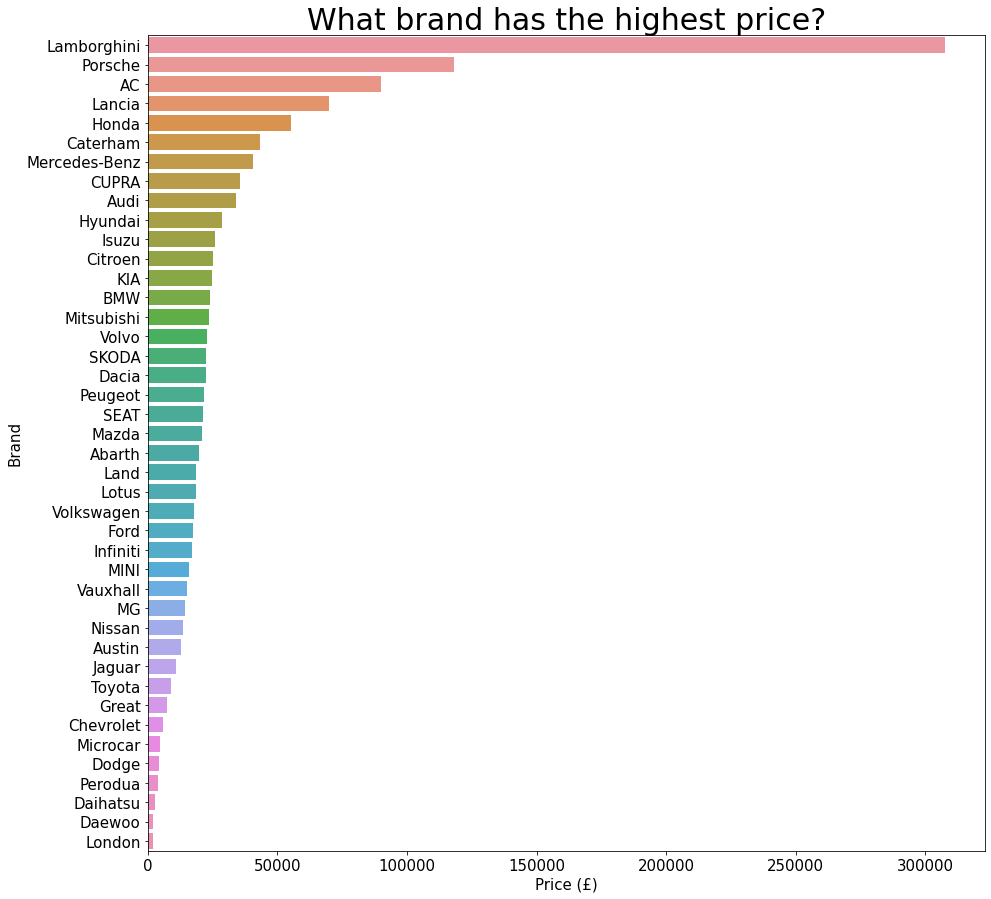

In [35]:
plt.figure(figsize = (15,15))
sns.barplot(x = 'price', y = 'make', data = max_price)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Price (£)', fontsize = 15)
plt.ylabel('Brand', fontsize = 15)
plt.title('What brand has the highest price?', fontsize = 30)
plt.show()

In [36]:
autoall_df.columns

Index(['price', 'year', 'type', 'mileage', 'engine_size', 'power',
       'transmission', 'fueltype', 'make', 'model', 'age (years)'],
      dtype='object')

In [37]:
#resetting index
autoall_df = autoall_df.reset_index()

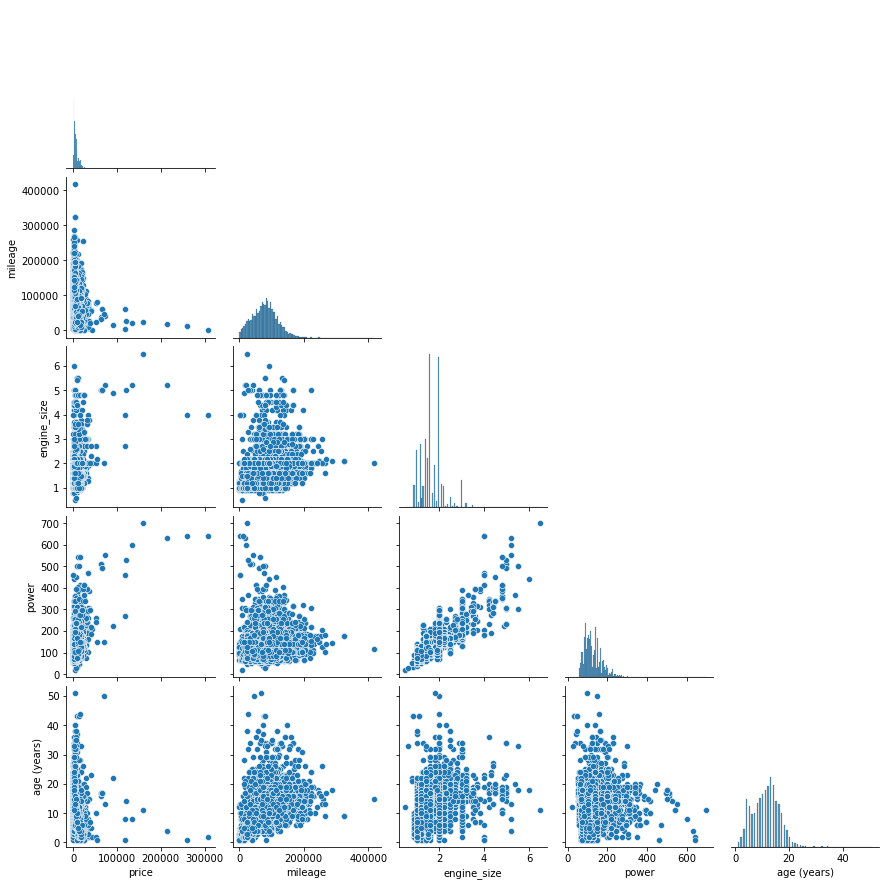

In [38]:
#getting pairplot of the continous data
sns.pairplot(data = autoall_df[['price', 'mileage', 'engine_size', 'power', 
                               'age (years)']], corner = True)
plt.show()

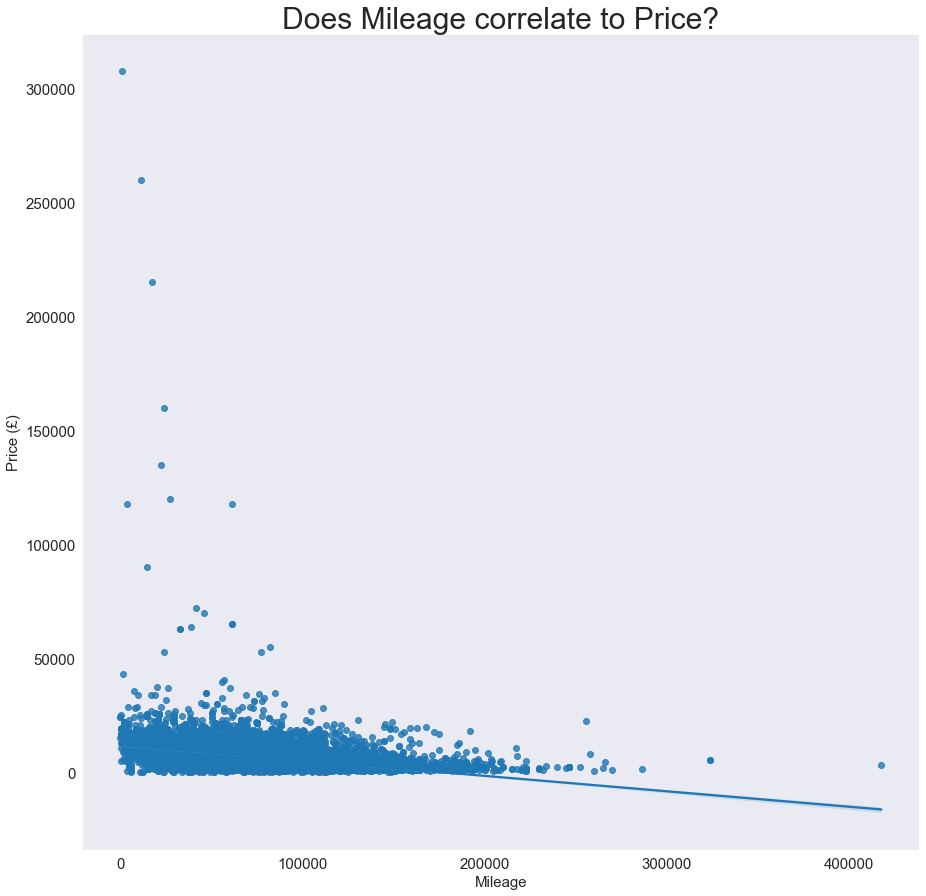

In [39]:
#how mileage correlates to price
plt.figure(figsize = (15,15))
sns.set_style('dark')
sns.regplot(x = 'mileage', y = 'price', data = autoall_df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Mileage', fontsize = 15)
plt.ylabel('Price (£)', fontsize = 15)
plt.title('Does Mileage correlate to Price?', fontsize = 30)
plt.show()


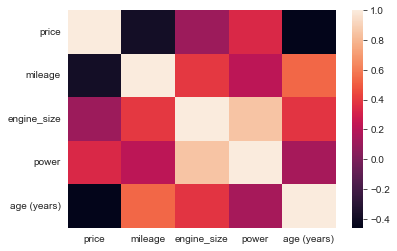

In [40]:
#heatmap to represent correlation of continous data
sns.heatmap(data = autoall_df[['price', 'mileage', 'engine_size', 'power', 
                               'age (years)']].corr())
plt.show()

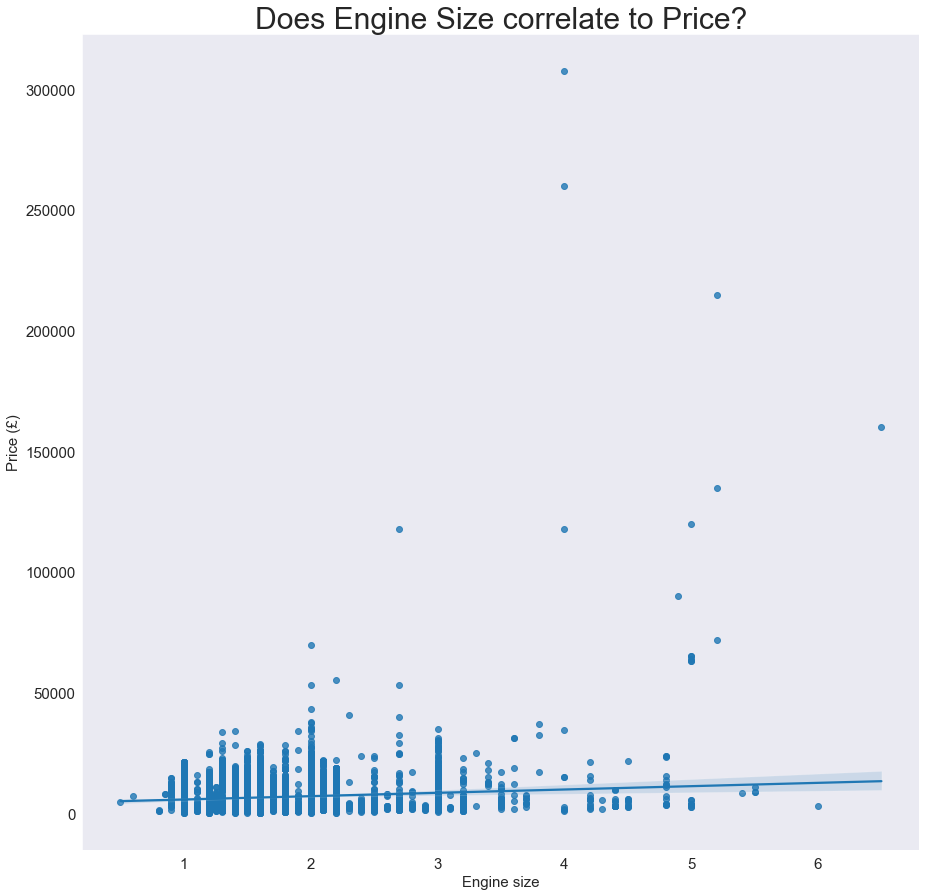

In [41]:
plt.figure(figsize = (15,15))
sns.set_style('dark')
sns.regplot(x = 'engine_size', y = 'price', data = autoall_df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Engine size', fontsize = 15)
plt.ylabel('Price (£)', fontsize = 15)
plt.title('Does Engine Size correlate to Price?', fontsize = 30)
plt.show()

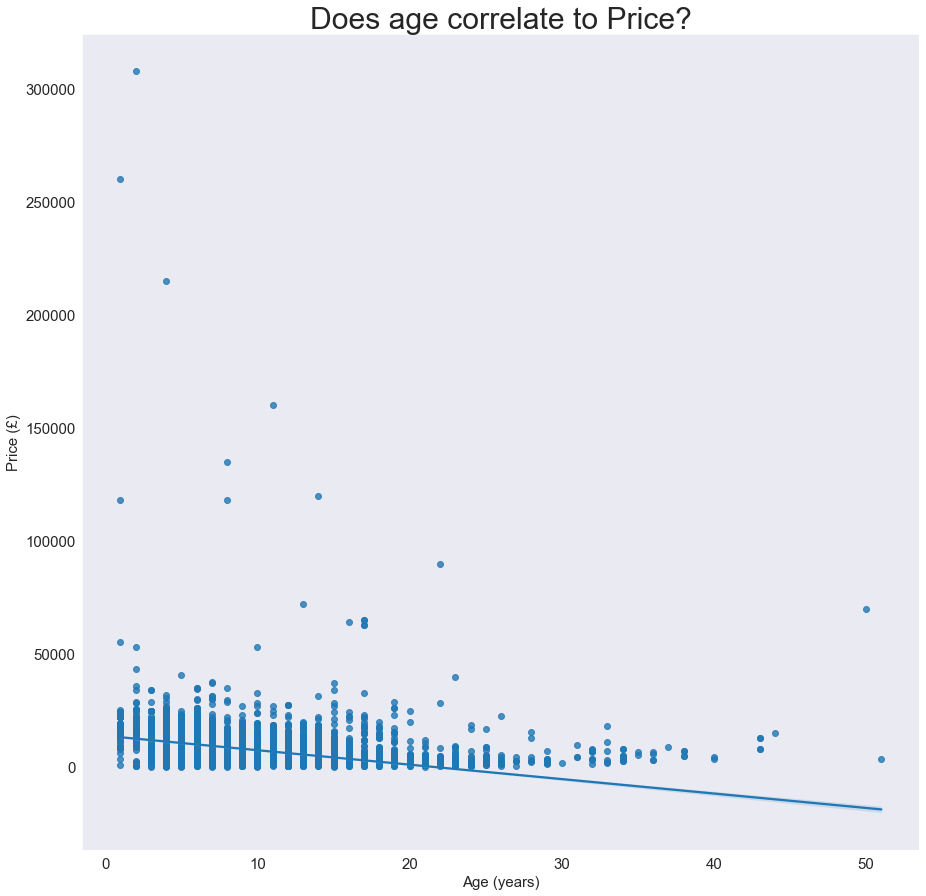

In [42]:
#how age of the car correlates to price
plt.figure(figsize = (15,15))
sns.set_style('dark')
sns.regplot(x = 'age (years)', y = 'price', data = autoall_df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age (years)', fontsize = 15)
plt.ylabel('Price (£)', fontsize = 15)
plt.title('Does age correlate to Price?', fontsize = 30)
plt.show()

### Encoding for pre-processing

In [43]:
autoall_df.head()

,index,price,year,type,mileage,engine_size,power,transmission,fueltype,make,model,age (years)
0,0,89995.0,2001.0,Convertible,14400.0,4.9,225.0,Manual,Petrol,AC,Cobra,22.0
1,4,19698.0,2020.0,Convertible,37000.0,1.4,160.0,Manual,Petrol,Abarth,595,3.0
2,5,9800.0,2016.0,Hatchback,88935.0,1.4,160.0,Manual,Petrol,Abarth,595,7.0
3,6,7950.0,2014.0,Hatchback,53000.0,1.4,135.0,Manual,Petrol,Abarth,595,9.0
4,7,5594.0,2009.0,Hatchback,25000.0,1.4,160.0,Manual,Petrol,Abarth,500,14.0


In [44]:
#getting type of value counts 

autoall_df['type'].value_counts()

Hatchback          6641
SUV                2248
Saloon             1460
Estate              863
MPV                 731
Coupe               727
Convertible         690
Pickup               44
Combi Van            18
Car Derived Van       7
Minibus               4
Limousine             1
Name: type, dtype: int64

In [45]:
#removing redundant features
autoall_df = autoall_df.drop(columns = ['year',
                                       'model'])
autoall_df = autoall_df.drop(columns = ['index'])

In [47]:
trans_and_fuel = autoall_df[['transmission', 'fueltype']]

In [48]:
#one hot encoding/getting dummy 1's and 0's for transmission + fuel
trans_and_fuel = pd.get_dummies(trans_and_fuel)

In [49]:
trans_and_fuel.head()

,transmission_Automatic,transmission_Manual,fueltype_Bi Fuel,fueltype_Diesel,fueltype_Diesel Hybrid,fueltype_Petrol,fueltype_Petrol Hybrid,fueltype_Petrol Plug-in Hybrid
0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0


### mean encoding 


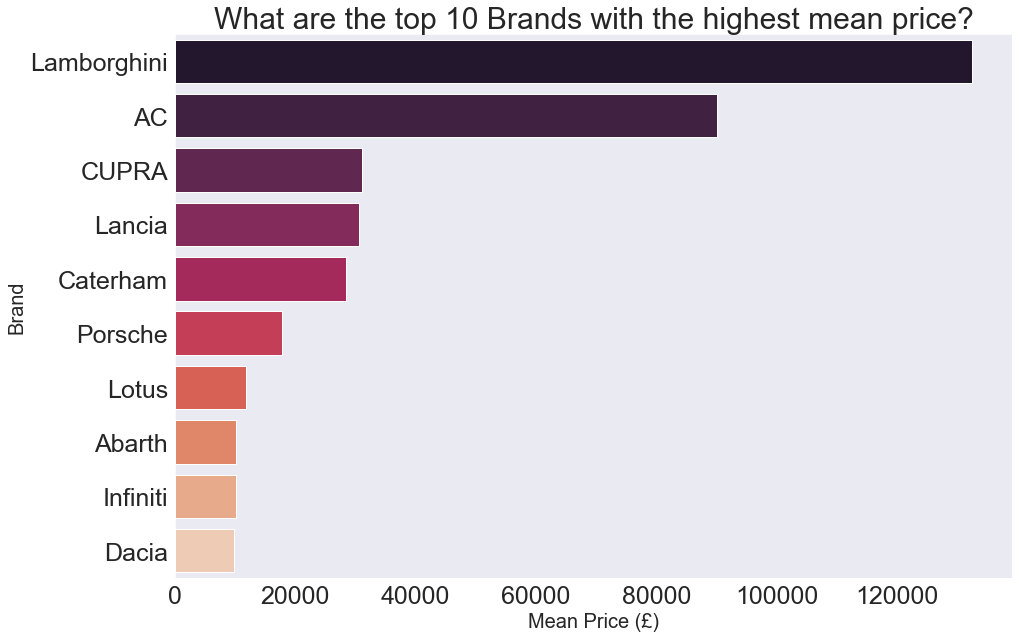

In [50]:
#visualising mean price grouped by brand 
brand = autoall_df.groupby(['make'])['price'].mean().reset_index()

brand_sort = brand.sort_values(by='price', ascending = False) #sorting values and getting a top 10

plt.figure(figsize = (15,10))
sns.barplot(x = 'price', y = 'make', data = brand_sort.head(10), palette = 'rocket')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Mean Price (£)', fontsize = 20)
plt.ylabel('Brand', fontsize = 20)
plt.title('What are the top 10 Brands with the highest mean price?', fontsize = 30)
plt.show()




In [52]:
#mapping the mean prices per brand to the dataframe 
brand_mean = autoall_df.groupby(['make'])['price'].mean().to_dict()

In [53]:
autoall_df['brand_mean'] = autoall_df['make'].map(brand_mean)

In [54]:
autoall_df.head()

,price,type,mileage,engine_size,power,transmission,fueltype,make,age (years),brand_mean
0,89995.0,Convertible,14400.0,4.9,225.0,Manual,Petrol,AC,22.0,89995.0
1,19698.0,Convertible,37000.0,1.4,160.0,Manual,Petrol,Abarth,3.0,10205.5
2,9800.0,Hatchback,88935.0,1.4,160.0,Manual,Petrol,Abarth,7.0,10205.5
3,7950.0,Hatchback,53000.0,1.4,135.0,Manual,Petrol,Abarth,9.0,10205.5
4,5594.0,Hatchback,25000.0,1.4,160.0,Manual,Petrol,Abarth,14.0,10205.5


In [55]:
#getting mean price grouped by car type
type_mean1 = autoall_df.groupby(['type'])['price'].mean().reset_index()
type_mean1

,type,price
0,Car Derived Van,5281.571429
1,Combi Van,17789.833333
2,Convertible,7121.259420
3,Coupe,8242.665750
4,Estate,6073.703360
5,Hatchback,5551.993224
6,Limousine,3995.000000
7,MPV,4839.537620
8,Minibus,5221.750000
9,Pickup,7935.431818


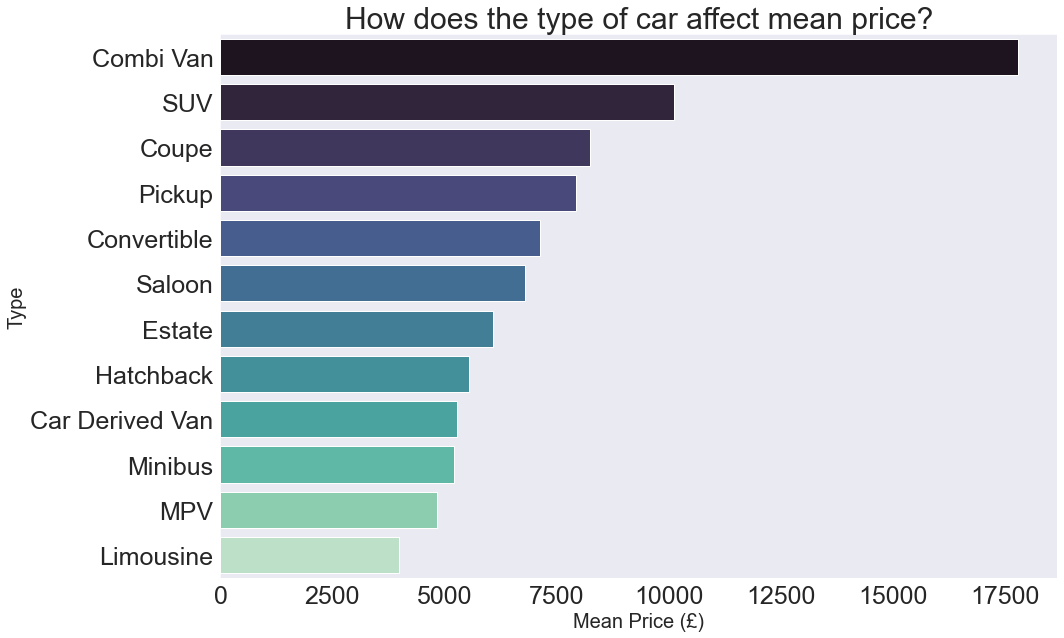

In [56]:
#visualising types based on mean price 
type_mean1_sort = type_mean1.sort_values(by = 'price', ascending = False)

plt.figure(figsize = (15,10))
sns.barplot(x = 'price', y = 'type', data = type_mean1_sort, palette = 'mako')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Mean Price (£)', fontsize = 20)
plt.ylabel('Type', fontsize = 20)
plt.title('How does the type of car affect mean price?', fontsize = 30)
plt.show()




In [57]:
#mapping the car type to original dataframe
type_mean = autoall_df.groupby(['type'])['price'].mean().to_dict()

In [58]:
autoall_df['type_mean'] = autoall_df['type'].map(type_mean)

In [59]:
autoall_df

,price,type,mileage,engine_size,power,transmission,fueltype,make,age (years),brand_mean,type_mean
0,89995.0,Convertible,14400.0,4.9,225.0,Manual,Petrol,AC,22.0,89995.00000,7121.259420
1,19698.0,Convertible,37000.0,1.4,160.0,Manual,Petrol,Abarth,3.0,10205.50000,7121.259420
2,9800.0,Hatchback,88935.0,1.4,160.0,Manual,Petrol,Abarth,7.0,10205.50000,5551.993224
3,7950.0,Hatchback,53000.0,1.4,135.0,Manual,Petrol,Abarth,9.0,10205.50000,5551.993224
4,5594.0,Hatchback,25000.0,1.4,160.0,Manual,Petrol,Abarth,14.0,10205.50000,5551.993224
...,...,...,...,...,...,...,...,...,...,...,...
13429,4400.0,MPV,69400.0,1.6,104.0,Manual,Diesel,SEAT,13.0,6899.97545,4839.537620
13430,8079.0,Hatchback,24590.0,1.0,74.0,Manual,Petrol,SEAT,7.0,6899.97545,5551.993224
13431,8079.0,Hatchback,24590.0,1.0,74.0,Manual,Petrol,SEAT,7.0,6899.97545,5551.993224
13432,14300.0,SUV,44520.0,1.0,113.0,Manual,Petrol,SEAT,4.0,6899.97545,10125.882562


In [60]:
### rearranging columns

non_numeric_auto = autoall_df[['type',
                              'transmission',
                              'fueltype',
                              'make']]

numeric_auto = autoall_df[['mileage',
                          'engine_size',
                          'power',
                          'age (years)',
                          'brand_mean',
                          'type_mean',
                          'price']]

In [61]:
#concatenation 
auto_new = pd.concat([non_numeric_auto, trans_and_fuel, numeric_auto], axis = 1)

In [63]:
#isolating independent features
auto_inputs = auto_new.iloc[:,4:18]

In [67]:
auto_inputs

,transmission_Automatic,transmission_Manual,fueltype_Bi Fuel,fueltype_Diesel,fueltype_Diesel Hybrid,fueltype_Petrol,fueltype_Petrol Hybrid,fueltype_Petrol Plug-in Hybrid,mileage,engine_size,power,age (years),brand_mean,type_mean
0,0,1,0,0,0,1,0,0,14400.0,4.9,225.0,22.0,89995.00000,7121.259420
1,0,1,0,0,0,1,0,0,37000.0,1.4,160.0,3.0,10205.50000,7121.259420
2,0,1,0,0,0,1,0,0,88935.0,1.4,160.0,7.0,10205.50000,5551.993224
3,0,1,0,0,0,1,0,0,53000.0,1.4,135.0,9.0,10205.50000,5551.993224
4,0,1,0,0,0,1,0,0,25000.0,1.4,160.0,14.0,10205.50000,5551.993224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13429,0,1,0,1,0,0,0,0,69400.0,1.6,104.0,13.0,6899.97545,4839.537620
13430,0,1,0,0,0,1,0,0,24590.0,1.0,74.0,7.0,6899.97545,5551.993224
13431,0,1,0,0,0,1,0,0,24590.0,1.0,74.0,7.0,6899.97545,5551.993224
13432,0,1,0,0,0,1,0,0,44520.0,1.0,113.0,4.0,6899.97545,10125.882562


In [68]:
#columns of the features
features = auto_inputs.columns

In [69]:
display(auto_inputs.columns)
display(auto_inputs.values)

Index(['transmission_Automatic', 'transmission_Manual', 'fueltype_Bi Fuel',
       'fueltype_Diesel', 'fueltype_Diesel Hybrid', 'fueltype_Petrol',
       'fueltype_Petrol Hybrid', 'fueltype_Petrol Plug-in Hybrid', 'mileage',
       'engine_size', 'power', 'age (years)', 'brand_mean', 'type_mean'],
      dtype='object')

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.20000000e+01, 8.99950000e+04, 7.12125942e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 1.02055000e+04, 7.12125942e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        7.00000000e+00, 1.02055000e+04, 5.55199322e+03],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        7.00000000e+00, 6.89997545e+03, 5.55199322e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.00000000e+00, 6.89997545e+03, 1.01258826e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.00000000e+00, 6.89997545e+03, 5.55199322e+03]])

In [70]:
#Assigning dataframe features and target variable to X and y
X = auto_new[features].values.reshape(-1, len(features))
y = auto_new['price'].values


In [71]:
#saving the columns for feature importance later 
input_columns = auto_inputs.columns
input_columns

Index(['transmission_Automatic', 'transmission_Manual', 'fueltype_Bi Fuel',
       'fueltype_Diesel', 'fueltype_Diesel Hybrid', 'fueltype_Petrol',
       'fueltype_Petrol Hybrid', 'fueltype_Petrol Plug-in Hybrid', 'mileage',
       'engine_size', 'power', 'age (years)', 'brand_mean', 'type_mean'],
      dtype='object')

In [73]:
display(y.shape)
display(X.shape)

(13434,)

(13434, 14)

In [74]:
#checking the parameters for each chosen ML model
lass = Lasso()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

print('lasso params: ')
display(lass.get_params(deep = True))

print('decision tree params: ')
display(dtr.get_params(deep = True))

print('Random Forest Params: ')
display(rf.get_params(deep = True))

lasso params: 


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

decision tree params: 


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Random Forest Params: 


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### train test split 


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [76]:
#getting shape and length of X_train and X_test

def shape_and_length(train_data, test_data):
    print('shape:')
    print('\n')
    print('train data: ',train_data.shape)
    print('test data: ',test_data.shape)
    print('\n')
    print('Length:')
    print('\n')
    print('Train data length: ', len(train_data))
    print('Test data length: ', len(test_data))

shape_and_length(X_train, X_test)

shape:


train data:  (10747, 14)
test data:  (2687, 14)


Length:


Train data length:  10747
Test data length:  2687


In [77]:
# getting shape and length of y_train and y_test

shape_and_length(y_train, y_test)

shape:


train data:  (10747,)
test data:  (2687,)


Length:


Train data length:  10747
Test data length:  2687


(array([[1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000

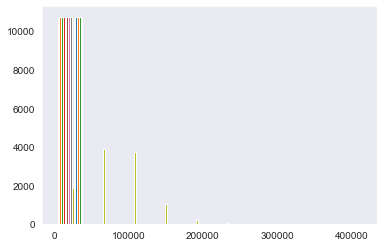

In [78]:
#checking histograms to check for gaussian distribution
plt.hist(X_train)

(array([[2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

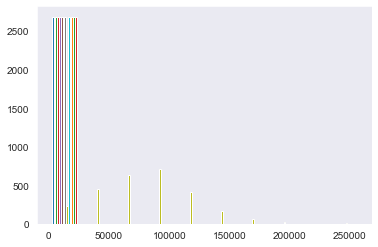

In [79]:
plt.hist(X_test)

### standardisation/normalisation 


In [81]:
ss = StandardScaler()

ss.fit(X_train)
ss.fit(X_test)

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)





(array([[1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0713e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4000e+01,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0740e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00],
        [1.0747e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0705e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2000e+01,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0741e+04, 0.0000

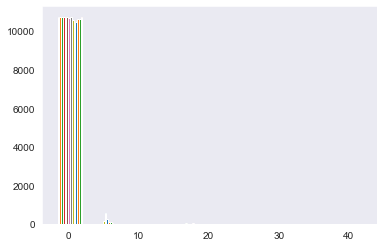

In [82]:
#plotting scaled data
plt.hist(X_train)


(array([[2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.681e+03, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.686e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [2.687e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.675e+03, 0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.684e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
         0.000e+00, 0.

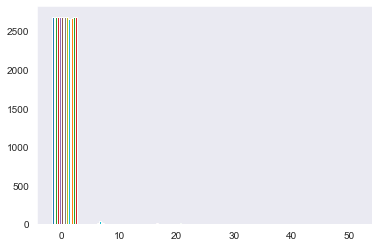

In [83]:
plt.hist(X_test)

### Lasso 

In [84]:
# assessing alpha scores 

alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

lasso_r2score_train = {}
lasso_r2score_test = {}

for alpha in alphas: 
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    lasso_r2score_train[alpha] = lasso.score(X_train, y_train)
    lasso_r2score_test[alpha] = lasso.score(X_test, y_test)
    



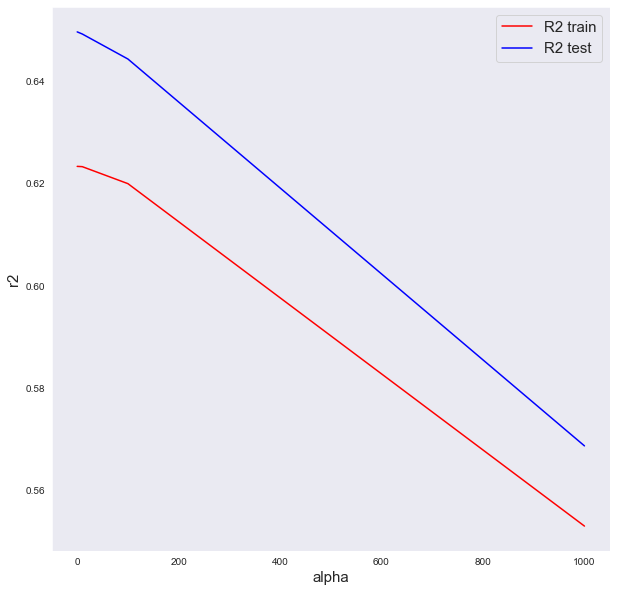

In [85]:
#plotting alpha scores against regression scores for training and testing 
plt.figure(figsize = (10,10))
plt.plot(alphas, lasso_r2score_train.values(), color = 'red')
plt.plot(alphas, lasso_r2score_test.values(), color = 'blue')
plt.legend(labels = ['R2 train', 'R2 test'], fontsize = 15)
plt.xlabel('alpha', fontsize = 15)
plt.ylabel('r2', fontsize = 15)
plt.show()

In [86]:
#CV and hyper parameter tuning lasso 
lass = Lasso(alpha = 0.01, random_state = 42)

param_grid = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0],
             'fit_intercept': [True, False],
             'positive':[True, False],
             'selection':['cyclic', 'random']} #defining a parameter grid 

kf = KFold(n_splits = 5, random_state = 42, shuffle = True) #KFold cross validation 

#grid search cv to cross validate and pick best hyper parameters 

lass_cv = GridSearchCV(lass, param_grid, scoring = 'r2', cv = kf, refit = True) 

#fitting to model
lass_cv.fit(X_train, y_train.ravel())

#returning results 
print('Best params: {}'.format(lass_cv.best_params_))
print('Best r2 score: {}'.format(lass_cv.best_score_))
print('Best estimator: {}'.format(lass_cv.best_estimator_))
print('CV results: {}'.format(lass_cv.cv_results_))

# lass_cv_ypred = lass_cv.predict(X_test)

Best params: {'alpha': 1.0, 'fit_intercept': True, 'positive': False, 'selection': 'random'}
Best r2 score: 0.5881513471734762
Best estimator: Lasso(random_state=42, selection='random')
CV results: {'mean_fit_time': array([0.00959663, 0.01272502, 0.01844101, 0.11675091, 0.00799689,
       0.01279554, 0.02967682, 0.09043708, 0.00639806, 0.01279373,
       0.03198652, 0.05960531, 0.00159941, 0.00319867, 0.02079115,
       0.04028358, 0.00560317, 0.00959592, 0.00799637, 0.01726437,
       0.00319591, 0.00562696, 0.00596008, 0.01753459, 0.00829415,
       0.01693826, 0.01802192, 0.05961871, 0.00959592, 0.01251101,
       0.01038871, 0.04389725, 0.00639749, 0.0063972 , 0.00159941,
       0.01599321, 0.00159931, 0.00479822, 0.00319862, 0.01599331,
       0.01767907, 0.00319948, 0.00579104, 0.02808175, 0.01930299,
       0.00159931, 0.00484247, 0.02837782]), 'std_fit_time': array([9.32537959e-03, 4.00408203e-03, 1.13805281e-02, 2.97492350e-02,
       2.86102295e-07, 8.15439876e-03, 1.22490549

In [87]:
#testing predictions
lass_cv_ypred = lass_cv.best_estimator_.predict(X_test)

In [88]:
#training predictions
lasscv_ypred_train = lass_cv.best_estimator_.predict(X_train)

In [89]:
#shape and length 
shape_and_length(X_train, y_train)

shape:


train data:  (10747, 14)
test data:  (10747,)


Length:


Train data length:  10747
Test data length:  10747


In [90]:
shape_and_length(X_train, lasscv_ypred_train)

shape:


train data:  (10747, 14)
test data:  (10747,)


Length:


Train data length:  10747
Test data length:  10747


In [91]:
shape_and_length(X_train, lasscv_ypred_train)

shape:


train data:  (10747, 14)
test data:  (10747,)


Length:


Train data length:  10747
Test data length:  10747


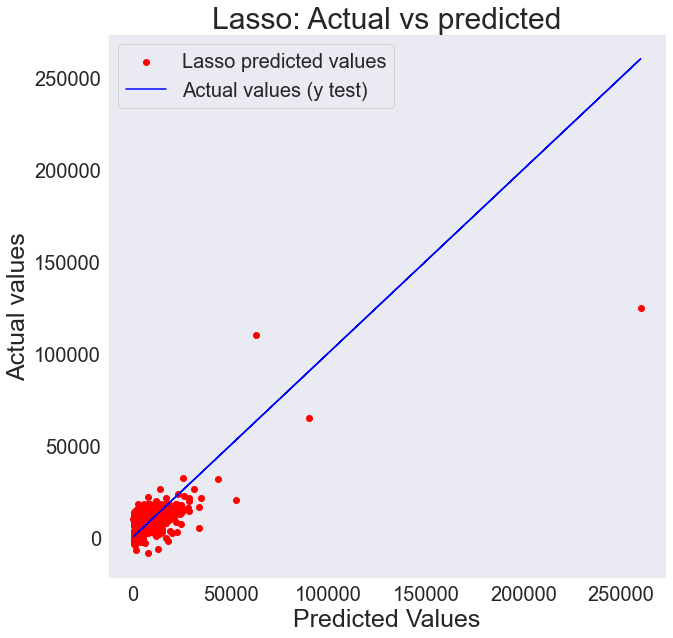

In [93]:
#testing plot 
plt.figure(figsize = (10,10))
plt.scatter(y_test, lass_cv_ypred, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Predicted Values', fontsize = 25)
plt.ylabel('Actual values', fontsize = 25)
plt.title('Lasso: Actual vs predicted', fontsize = 30)
plt.legend(fontsize = 20, labels = ['Lasso predicted values', 'Actual values (y test)'])
plt.show()

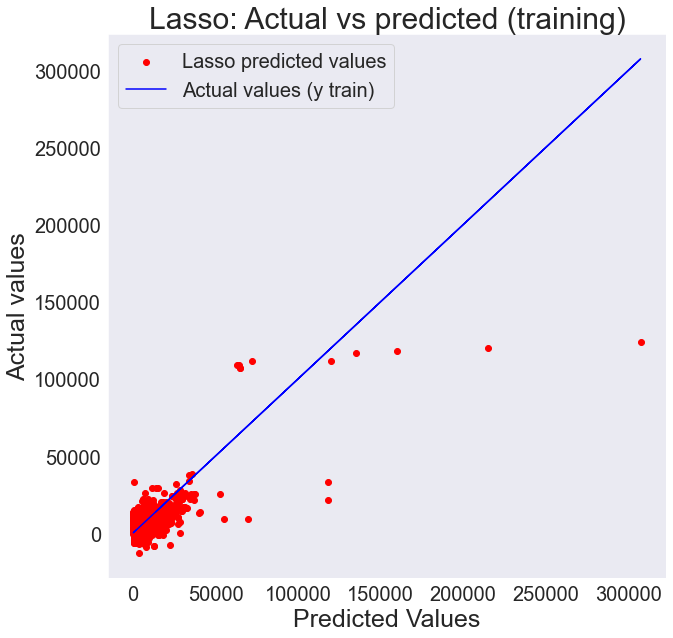

In [118]:
#training plot 
plt.figure(figsize = (10,10))
plt.scatter(y_train, lasscv_ypred_train, color = 'red')
plt.plot(y_train, y_train, color = 'blue')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Predicted Values', fontsize = 25)
plt.ylabel('Actual values', fontsize = 25)
plt.title('Lasso: Actual vs predicted (training)', fontsize = 30)
plt.legend(fontsize = 20, labels = ['Lasso predicted values', 'Actual values (y train)'])
plt.show()

In [94]:
#function to get stats for training and testing
def stats(test, pred):
    r2 = r2_score(test,pred)
    MSE = mean_squared_error(test,pred)
    RMSE = mean_squared_error(test,pred,squared = False)
    MAE = mean_absolute_error(test,pred)
    
    print('R2: \n', round(r2, 2))
    print('MSE: \n', round(MSE, 2))
    print('RMSE: \n', round(RMSE, 2))
    print('MAE: \n', round(MAE, 2))
    
stats(y_test, lass_cv_ypred)

R2: 
 0.65
MSE: 
 18895678.94
RMSE: 
 4346.92
MAE: 
 2323.22


In [95]:
stats(y_train, lasscv_ypred_train )

R2: 
 0.62
MSE: 
 17569269.37
RMSE: 
 4191.57
MAE: 
 2276.12


## re-training random forest and decision tree regression without standardizing 

In [98]:
X = auto_new[features].values.reshape(-1, len(features))
y = auto_new['price'].values

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


## random forest regressor 

In [100]:
param_grid = {'n_estimators': [1100,1200,1300,1400],'max_depth': [7,9,11,20]}

# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=1100 ,max_depth=7, random_state = 42)

kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

# Initialize the grid search - includes cross validation
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, refit = True, n_jobs = -1)

# Fit the grid search to the data
rf_cv.fit(X_train, y_train.ravel())

# Print the best parameters and score
print("Best Parameters:", rf_cv.best_params_)
print('Best r2 score: ', rf_cv.best_score_)
print('Best estimator: ',rf_cv.best_estimator_)

Best Parameters: {'max_depth': 20, 'n_estimators': 1100}
Best r2 score:  0.6672411074078913
Best estimator:  RandomForestRegressor(max_depth=20, n_estimators=1100, random_state=42)


In [101]:
#Test data predictions 
rf_cv_pred = rf_cv.best_estimator_.predict(X_test)



In [102]:
#Training data predictions 
rf_cv_pred_tr = rf_cv.best_estimator_.predict(X_train)

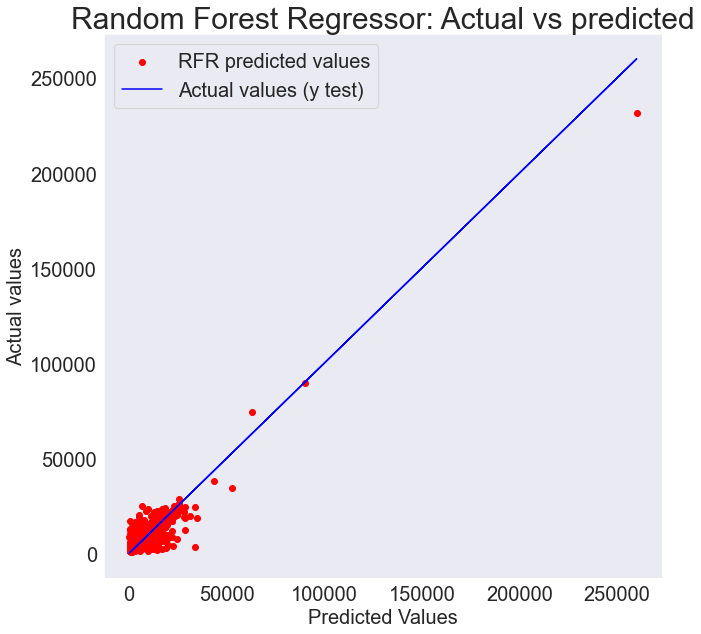

In [115]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, rf_cv_pred, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.xlabel('Predicted Values', fontsize = 20)
plt.ylabel('Actual values', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Random Forest Regressor: Actual vs predicted', fontsize = 30)
plt.legend(fontsize = 20, labels = ['RFR predicted values', 'Actual values (y test)'])
plt.show()

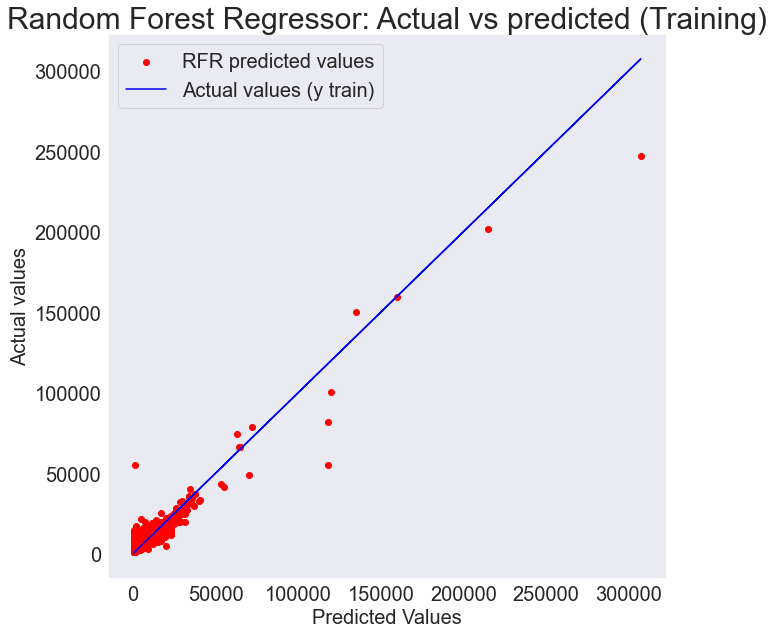

In [116]:
#training plots
plt.figure(figsize = (10,10))
plt.scatter(y_train, rf_cv_pred_tr, color = 'red')
plt.plot(y_train, y_train, color = 'blue')
plt.xlabel('Predicted Values', fontsize = 20)
plt.ylabel('Actual values', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Random Forest Regressor: Actual vs predicted (Training)', fontsize = 30)
plt.legend(fontsize = 20, labels = ['RFR predicted values', 'Actual values (y train)'])
plt.show()

In [105]:
#stats test predictions
stats(y_test, rf_cv_pred)


R2: 
 0.88
MSE: 
 6683026.12
RMSE: 
 2585.15
MAE: 
 1247.36


In [106]:
#stats train predictions
stats(y_train, rf_cv_pred_tr)


R2: 
 0.94
MSE: 
 2807519.24
RMSE: 
 1675.57
MAE: 
 590.12


In [107]:
#saving the model for deployment 

#load model from disk
# import pickle

# with open('randomforest_regressor.pkl', 'wb') as file:
#     pickle.dump(rf_cv, file)

## decision tree regressor

In [108]:
#initialise decision tree
dtr = DecisionTreeRegressor(random_state = 42, max_depth = 5, min_samples_leaf = 5)

#defining parameters

params = {'splitter':['best', 'random'],
         'max_depth':[1,3,5,7,9,10],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

#CV 
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

#storing CV and tuned decision tree
dtr_cv = GridSearchCV(dtr, params, scoring = 'r2', cv = kf, refit = True)

#fit to the model
dtr_cv.fit(X_train, y_train.ravel())

#results 
print('Best params: {}'.format(dtr_cv.best_params_))
print('Best r2 score: {}'.format(dtr_cv.best_score_))
print('Best estimator: {}'.format(dtr_cv.best_estimator_))
print('CV results: {}'.format(dtr_cv.cv_results_))

Best params: {'max_depth': 10, 'min_samples_leaf': 3, 'splitter': 'random'}
Best r2 score: 0.6739171699303734
Best estimator: DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, random_state=42,
                      splitter='random')
CV results: {'mean_fit_time': array([0.00251913, 0.00139561, 0.00324841, 0.00158496, 0.00161362,
       0.00161438, 0.0015985 , 0.00159931, 0.00319862, 0.00159931,
       0.00159993, 0.        , 0.00319834, 0.0015995 , 0.00159802,
       0.00158491, 0.0032001 , 0.00159788, 0.00159926, 0.00159936,
       0.00479803, 0.00164795, 0.00319829, 0.00159965, 0.00159698,
       0.00319734, 0.0036181 , 0.00208778, 0.00397239, 0.00321593,
       0.00479674, 0.00159903, 0.00639935, 0.0013413 , 0.00322876,
       0.00205574, 0.00410047, 0.00319247, 0.0025938 , 0.00160613,
       0.00576444, 0.00273142, 0.00853891, 0.00317454, 0.00802169,
       0.00204968, 0.00650358, 0.00138555, 0.00582771, 0.00200043,
       0.00849566, 0.00318899, 0.00797386, 0.00160761, 0.007

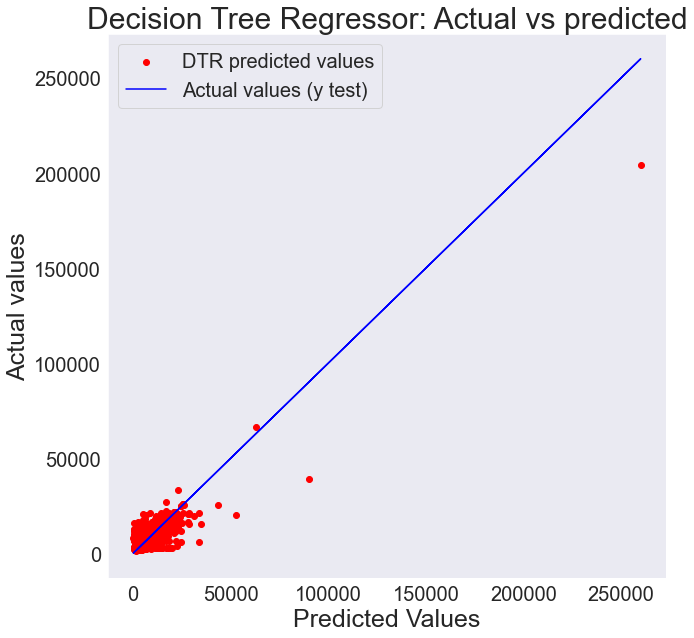

In [110]:

#predicting using cross validated and hyper parameter tuned model 
dtr_cv_ypred = dtr_cv.best_estimator_.predict(X_test)
dtr_cv_ypred_tr = dtr_cv.best_estimator_.predict(X_train)

#plotting test plot
plt.figure(figsize = (10,10))
plt.scatter(y_test, dtr_cv_ypred, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.xlabel('Predicted Values', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Actual values', fontsize = 25)
plt.title('Decision Tree Regressor: Actual vs predicted', fontsize = 30)
plt.legend(fontsize = 20, labels = ['DTR predicted values', 'Actual values (y test)'])
plt.show()



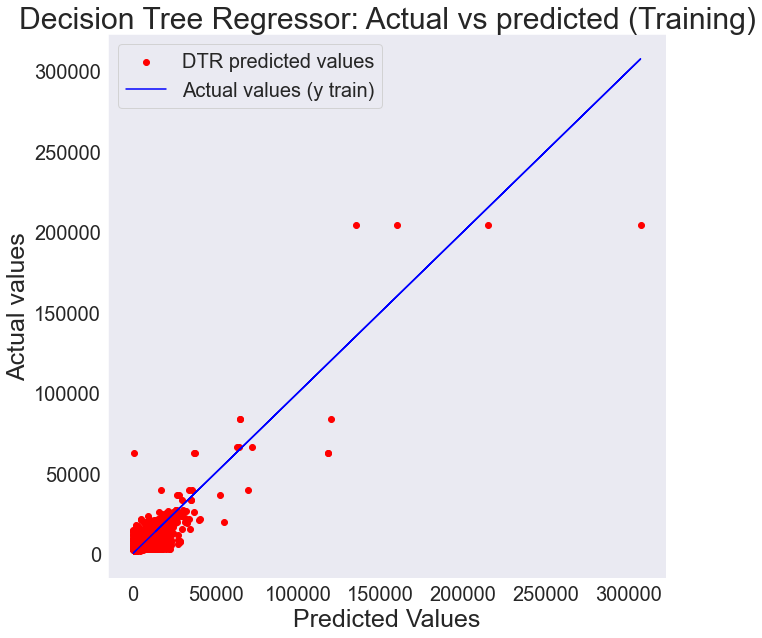

In [119]:
#training plot
plt.figure(figsize = (10,10))
plt.scatter(y_train, dtr_cv_ypred_tr, color = 'red')
plt.plot(y_train, y_train, color = 'blue')
plt.xlabel('Predicted Values', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Actual values', fontsize = 25)
plt.title('Decision Tree Regressor: Actual vs predicted (Training)', fontsize = 30)
plt.legend(fontsize = 20, labels = ['DTR predicted values', 'Actual values (y train)'])
plt.show()


In [120]:
#test data stats
stats(y_test, dtr_cv_ypred)

R2: 
 0.8
MSE: 
 10771303.24
RMSE: 
 3281.97
MAE: 
 1855.44


In [121]:
#training data stats
stats(y_train, dtr_cv_ypred_tr)

R2: 
 0.79
MSE: 
 9805547.92
RMSE: 
 3131.38
MAE: 
 1723.81


### Feature importance 

In [182]:
#Random Forest Regressor

#re fitting Cross validated random forest regressor 
rf_cv.fit(X_train, y_train.ravel())

rf_cv_feats = rf_cv.best_estimator_.feature_importances_



Index(['transmission_Automatic', 'transmission_Manual', 'fueltype_Bi Fuel',
       'fueltype_Diesel', 'fueltype_Diesel Hybrid', 'fueltype_Petrol',
       'fueltype_Petrol Hybrid', 'fueltype_Petrol Plug-in Hybrid', 'mileage',
       'engine_size', 'power', 'age (years)', 'brand_mean', 'type_mean'],
      dtype='object')

array([1.06557953e-02, 1.10271090e-02, 4.32416246e-05, 4.40779307e-03,
       1.59500360e-05, 4.78610176e-03, 4.20323620e-04, 2.73147347e-05,
       8.36034612e-02, 3.68088521e-02, 3.37662868e-01, 3.16842314e-01,
       1.72251750e-01, 2.14471255e-02])

RandomForestRegressor(max_depth=20, n_estimators=1100, random_state=42)

C:\AnacondaInstallation\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


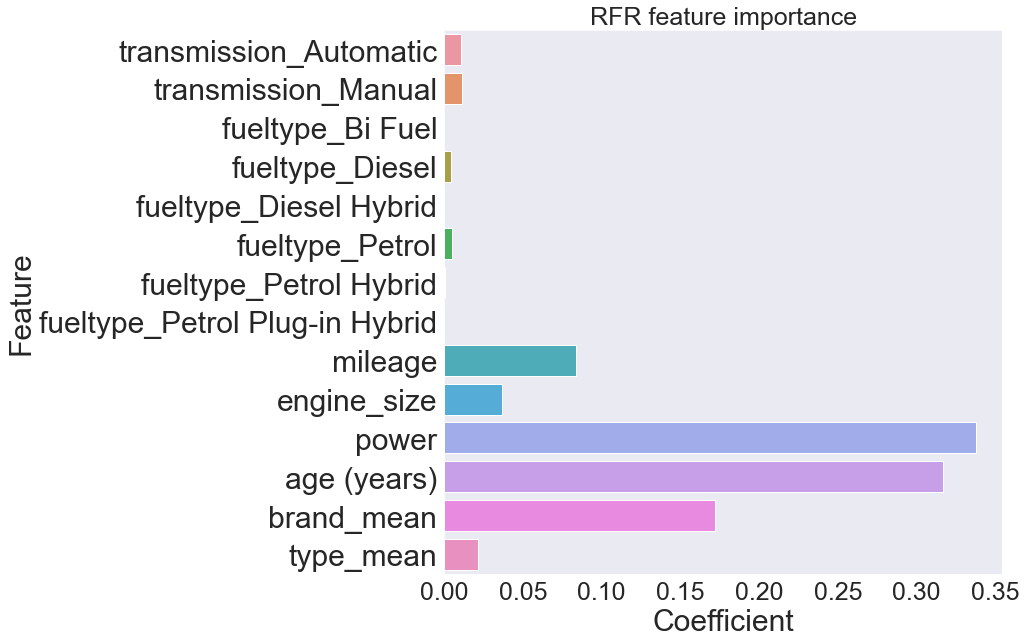

In [209]:
#plotting and visualising feature importance 
plt.figure(figsize = (10,10))
plt.title('RFR feature importance', fontsize = 25)
sns.barplot(rf_cv_feats, input_columns)
plt.xticks(fontsize = 25)
plt.xlabel('Coefficient', fontsize = 30)
plt.ylabel('Feature', fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()


# Re-training Random Forest Regressor with less features 

In [190]:
auto_new.head()

,type,transmission,fueltype,make,transmission_Automatic,transmission_Manual,fueltype_Bi Fuel,fueltype_Diesel,fueltype_Diesel Hybrid,fueltype_Petrol,fueltype_Petrol Hybrid,fueltype_Petrol Plug-in Hybrid,mileage,engine_size,power,age (years),brand_mean,type_mean,price
0,Convertible,Manual,Petrol,AC,0,1,0,0,0,1,0,0,14400.0,4.9,225.0,22.0,89995.0,7121.259420,89995.0
1,Convertible,Manual,Petrol,Abarth,0,1,0,0,0,1,0,0,37000.0,1.4,160.0,3.0,10205.5,7121.259420,19698.0
2,Hatchback,Manual,Petrol,Abarth,0,1,0,0,0,1,0,0,88935.0,1.4,160.0,7.0,10205.5,5551.993224,9800.0
3,Hatchback,Manual,Petrol,Abarth,0,1,0,0,0,1,0,0,53000.0,1.4,135.0,9.0,10205.5,5551.993224,7950.0
4,Hatchback,Manual,Petrol,Abarth,0,1,0,0,0,1,0,0,25000.0,1.4,160.0,14.0,10205.5,5551.993224,5594.0


In [198]:
#input new selected features
rf_input_feats = auto_new[[
         'transmission_Automatic',
         'transmission_Manual',
         'fueltype_Diesel',
         'fueltype_Petrol',
         'mileage', 
         'engine_size',
         'power',
         'age (years)',
         'brand_mean',
         'type_mean']]


In [199]:
rf_input_feats

,transmission_Automatic,transmission_Manual,fueltype_Diesel,fueltype_Petrol,mileage,engine_size,power,age (years),brand_mean,type_mean
0,0,1,0,1,14400.0,4.9,225.0,22.0,89995.00000,7121.259420
1,0,1,0,1,37000.0,1.4,160.0,3.0,10205.50000,7121.259420
2,0,1,0,1,88935.0,1.4,160.0,7.0,10205.50000,5551.993224
3,0,1,0,1,53000.0,1.4,135.0,9.0,10205.50000,5551.993224
4,0,1,0,1,25000.0,1.4,160.0,14.0,10205.50000,5551.993224
...,...,...,...,...,...,...,...,...,...,...
13429,0,1,1,0,69400.0,1.6,104.0,13.0,6899.97545,4839.537620
13430,0,1,0,1,24590.0,1.0,74.0,7.0,6899.97545,5551.993224
13431,0,1,0,1,24590.0,1.0,74.0,7.0,6899.97545,5551.993224
13432,0,1,0,1,44520.0,1.0,113.0,4.0,6899.97545,10125.882562


In [200]:
#assigning to X and y 
X = rf_input_feats.values

y = auto_new['price'].values

In [201]:
#splitting training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [202]:
#checking shape
shape_and_length(X_train, X_test)

shape:


train data:  (10747, 10)
test data:  (2687, 10)


Length:


Train data length:  10747
Test data length:  2687


In [203]:
shape_and_length(y_train, y_test)

shape:


train data:  (10747,)
test data:  (2687,)


Length:


Train data length:  10747
Test data length:  2687


In [204]:
# Define the parameter grid
param_grid = {'n_estimators': [1100,1200,1300,1400],'max_depth': [7,9,11,20]}

# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=1100 ,max_depth=7, random_state = 42)

kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

# Initialize the grid search - includes cross validation
rf_cv2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, refit = True, n_jobs = -1)

# Fit the grid search to the data
rf_cv2.fit(X_train, y_train.ravel())

print("Best Parameters:", rf_cv2.best_params_)
print('Best r2 score: ', rf_cv2.best_score_)
print('Best estimator: ',rf_cv2.best_estimator_)





Best Parameters: {'max_depth': 20, 'n_estimators': 1100}
Best r2 score:  0.6666840505961693
Best estimator:  RandomForestRegressor(max_depth=20, n_estimators=1100, random_state=42)


In [205]:
# Make predictions on the test data using the best estimator
rf_cv_ypred2 = rf_cv2.best_estimator_.predict(X_test)


In [ ]:
#make predictions on training data using best 
rf_cv_ypred2_tr = rf_cv2.best_estimator_.predict(X_train)


ValueError: x and y must be the same size

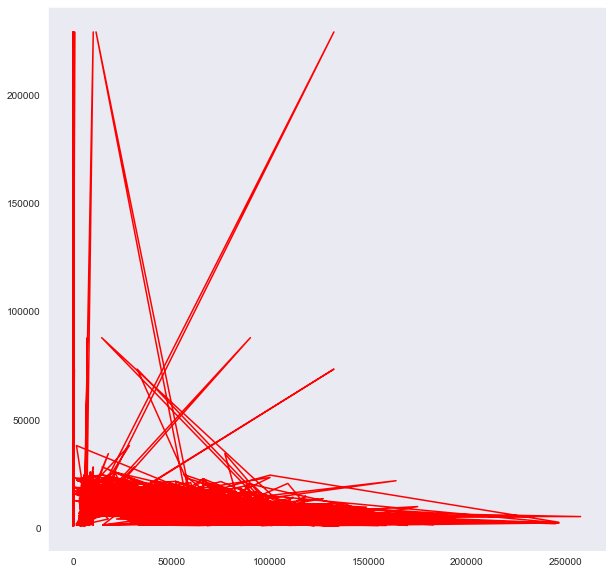

In [210]:
#training plot 
plt.figure(figsize = (10,10))
plt.scatter(y_train, rf_cv_ypred2_tr, color = 'red')
plt.plot(y_train, y_train, color = 'blue')
plt.xlabel('Predicted Values', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Actual values', fontsize = 25)
plt.title('Decision Tree Regressor: Actual vs predicted (Training)', fontsize = 30)
plt.legend(fontsize = 20, labels = ['RFR predicted values', 'Actual values (y train)'])
plt.show()

In [ ]:
#testing plot 
plt.figure(figsize = (10,10))
plt.scatter(y_test, rf_cv_ypred2, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.xlabel('Predicted Values', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Actual values', fontsize = 25)
plt.title('Decision Tree Regressor: Actual vs predicted (Training)', fontsize = 30)
plt.legend(fontsize = 20, labels = ['RFR predicted values', 'Actual values (y test)'])
plt.show()

In [207]:
#testing stats
stats(y_test, rf_cv_ypred2)


R2: 
 0.88
MSE: 
 6725518.18
RMSE: 
 2593.36
MAE: 
 1248.09


In [ ]:
#training stats
stats(y_train, rf_cv_ypred2_tr)